# PREDICTIVE MODELLING (AGRICULTURE)

## Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

<div style="text-align: center;">
    <img src="../Images/farmer_in_a_field.jpg" alt="Farmers" />
</div>

### Problem statement

A farmer reached out to you as a machine learning expert seeking help to select the best crop for his field. Due to budget constraints, the farmer explained that he could only afford to measure two or three out of the four essential soil measures:

- Nitrogen content ratio in the soil
- Phosphorous content ratio in the soil
- Potassium content ratio in the soil
- pH value of the soil

The expert realized that this is a classic feature selection problem, where the objective is to pick the most important features that could help predict the crop accurately. 

Measuring essential soil metrics such as 

- nitrogen, 
- phosphorous, 
- potassium levels, and 
- pH value 

is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called soil_measures.csv, which contains:

"N": Nitrogen content ratio in the soil
"P": Phosphorous content ratio in the soil
"K": Potassium content ratio in the soil
"pH" value of the soil
"crop": categorical values that contain various crops (target variable).
Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the "crop" column is the optimal choice for that field.

In this project, you will apply machine learning to build a multi-class classification model to predict the type of "crop", while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load and view the dataset
crops = pd.read_csv("../Data/soil_measures.csv")
print(crops.shape)
crops.head()

(2200, 5)


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [3]:
# Check for missing values
print(crops.isna().sum())

# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [4]:
# Standardize the data
scaler = StandardScaler()
crops_standardized = scaler.fit_transform(crops[["N", "P", "K", "ph"]])

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    crops_standardized,
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    log_reg.fit(X_train[:, [crops.columns.get_loc(feature)]], y_train)
    y_pred = log_reg.predict(X_test[:, [crops.columns.get_loc(feature)]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")


F1-score for N: 0.10689900116508289
F1-score for P: 0.08426955444720076
F1-score for K: 0.13831456375684123
F1-score for ph: 0.045464856528065166


In [5]:
# Calculate the correlation matrix
crops_corr = crops[["N", "P", "K", "ph"]].corr()
crops_corr

,N,P,K,ph
N,1.000000,-0.231460,-0.140512,0.096683
P,-0.231460,1.000000,0.736232,-0.138019
K,-0.140512,0.736232,1.000000,-0.169503
ph,0.096683,-0.138019,-0.169503,1.000000


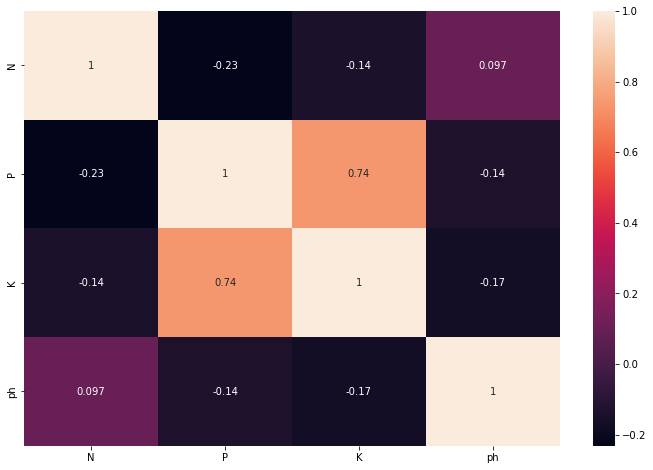

In [6]:
# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(crops_corr, annot=True, ax=ax)
plt.show()

To choose the three features to continue with the model, consider both the F1-scores and the correlation values.

- Potassium (K):
F1-score: 0.1383
Reasoning: K has the highest F1-score among all features.

- Phosphorus (P):
F1-score: 0.0843
Correlation with K: 0.7362
Reasoning: P has a decent F1-score, and it has a strong positive correlation with K.

- Nitrogen (N):
F1-score: 0.1069
Correlation with P: -0.2315
Reasoning: N has a reasonable F1-score, and it has a negative correlation with P, providing additional diversity to the selected features.

In [7]:
# Select the final features for the model
final_features = ["K", "P", "N"]

# Split the data with the final features
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a new model and evaluate performance
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial"
)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
model_performance = f1_score(y_test, y_pred, average="weighted")

In [8]:
model_performance

0.5524287438954815

In [9]:
y_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'grapes', 'coconut',
       'grapes', 'mungbean', 'mungbean', 'lentil', 'blackgram',
       'pomegranate', 'pomegranate', 'rice', 'coconut', 'pomegranate',
       'grapes', 'coffee', 'papaya', 'watermelon', 'coffee', 'papaya',
       'orange', 'papaya', 'chickpea', 'rice', 'mothbeans', 'orange',
       'blackgram', 'rice', 'pomegranate', 'mothbeans', 'rice', 'lentil',
       'rice', 'lentil', 'rice', 'chickpea', 'chickpea', 'mungbean',
       'papaya', 'coconut', 'lentil', 'maize', 'mango', 'maize', 'lentil',
       'coconut', 'watermelon', 'maize', 'lentil', 'coffee', 'grapes',
       'mango', 'coffee', 'lentil', 'cotton', 'apple', 'banana', 'lentil',
       'muskmelon', 'coconut', 'kidneybeans', 'orange', 'papaya',
       'blackgram', 'orange', 'rice', 'watermelon', 'mungbean',
       'muskmelon', 'coconut', 'rice', 'banana', 'blackgram', 'papaya',
       'banana', 'coffee', 'muskmelon', 'orange', 'coffee', 'chickpea',
       'ric

### Conclusion

1. **Interpreting the Model Performance:**

The F1 score of 0.55 indicates a moderate level of performance. While the model shows some predictive capability, there is room for improvement.

2. **Why were Nitrogen, Phosphorous, Potassium Features Selected?:**

These features were chosen based on their relevance and importance in soil assessment for crop growth. 

3. **Model Limitations:**

The model's predictive power might be affected by the fact that only three features were considered due to budget constraints. Including more features, if feasible, could potentially enhance the model's accuracy.

4. **Recommendations for Improvement:**

- Collecting more data if possible, including additional relevant features, 
- Trying different algorithms. 
- Continuous refinement and updates to the model could lead to better predictions over time.

5. **Decision-Making Process:**

The model is a tool to assist decision-making, but it should not be the sole factor. Farmers should consider other practical aspects, such as climate, local conditions, and their own experience, when deciding which crops to plant.

6. **next steps**
- Present Predictions (y_pred): the model's suggestions based on the provided soil measures.
- I encourage a continuous Collaboration with the farmers in areas including: assistance in refining the model, incorporating additional features, and adapting it as more data becomes available.

_END_